In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy
from astropy.io import fits
import os
from astropy.timeseries import LombScargle
import glob
import pathlib
from astroquery.mast import Observations
from astropy import units as u
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
from astropy.coordinates import SkyCoord
from tqdm import tqdm
import pickle
import lightkurve as lk
import scipy.stats as stats
import traceback
from scipy.signal import find_peaks
from IPython.display import Image, display
import scipy
# import exoplanet as xo

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/caleb/opt/anaconda3/envs/astron/lib/python3.10/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/caleb/.lightkurve/cache. Please move all the files in the legacy directory /Users/caleb/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [20]:
extra = [[],
 ['/Users/caleb/research/Astro_98/improved_scargles/LS_star_1_observation_1_of_1.pkl'],
 [],
 ['/Users/caleb/research/Astro_98/improved_scargles/LS_star_3_observation_1_of_2.pkl',
  '/Users/caleb/research/Astro_98/improved_scargles/LS_star_3_observation_2_of_2.pkl'],
 ['/Users/caleb/research/Astro_98/improved_scargles/LS_star_4_observation_1_of_1.pkl'],
 ['/Users/caleb/research/Astro_98/improved_scargles/LS_star_5_observation_1_of_1.pkl'],
 ['/Users/caleb/research/Astro_98/improved_scargles/LS_star_6_observation_1_of_3.pkl',
  '/Users/caleb/research/Astro_98/improved_scargles/LS_star_6_observation_2_of_3.pkl',
  '/Users/caleb/research/Astro_98/improved_scargles/LS_star_6_observation_3_of_3.pkl'],
 [],
 ['/Users/caleb/research/Astro_98/improved_scargles/LS_star_8_observation_1_of_1.pkl'],
 []]

In [6]:
# load m_dwarf sample
m_dwarf_sample = pd.read_csv('/Users/caleb/research/Astro_98/m_dwarf_sample_with_files_powers.csv',delimiter=',',index_col=0)
ra = np.array(m_dwarf_sample[m_dwarf_sample.columns[0]])
dec = np.array(m_dwarf_sample[m_dwarf_sample.columns[1]])
names = np.array(m_dwarf_sample[m_dwarf_sample.columns[2]])
masses = np.array(m_dwarf_sample[["Mass"]])

# load scargle paths
with open(f'/Users/caleb/research/Astro_98/all_scargle_paths.pkl','rb') as f:
    all_scargle_paths = pickle.load(f)


ValueError: Length of values (502) does not match length of index (512)

In [22]:
m_dwarf_sample['scargle_paths'] = full_scargle_paths


In [23]:
m_dwarf_sample

,RAJ2000,DEJ2000,Name,Comp,2MASS,Conf,l_Sep,Sep,PA,Date,...,e_Kmag,n_Kmag,Mass,e_Mass,n_Mass,Memb,SimbadName,file paths,power arrays,scargle_paths
2,00 04 36.46,-40 44 02.7,GJ 1001,A,00043643-4044020,A-BC,,18.2000,259,2003,...,0.040,,0.262,0.015,,s,GJ 1001,['tess2020238165205-s0029-0000000120459870-019...,/Users/caleb/research/Astro_98/power_pickles/p...,[]
3,00 06 43.19,-07 32 17.0,GJ 1002,,00064325-0732147,,,,,,...,0.021,,0.115,0.014,,s,GJ 1002,['tess2021232031932-s0042-0000000176287658-021...,['/Users/caleb/research/Astro_98/power_pickles...,[/Users/caleb/research/Astro_98/improved_scarg...
4,00 08 55.17,+49 18 56.3,LP 191-43,,00085512+4918561,,,,,,...,0.018,,0.111,0.014,,s,LP 191-43,[],[],[]
5,00 11 31.81,+59 08 39.9,LSPM 0011+5908,,00113182+5908400,,,,,,...,0.021,,0.107,0.014,,s,LSPM J0011+5908,['tess2022273165103-s0057-0000000452882423-024...,['/Users/caleb/research/Astro_98/power_pickles...,[/Users/caleb/research/Astro_98/improved_scarg...
6,00 15 28.07,-16 08 01.8,GJ 1005,A,00152799-1608008,AB,,0.3037,orb,1997,...,0.016,J,0.179,0.002,c,s,GJ 1005,['tess2020238165205-s0029-0000000012862728-019...,['/Users/caleb/research/Astro_98/power_pickles...,[/Users/caleb/research/Astro_98/improved_scarg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,23 42 52.74,+30 49 21.8,GJ 1288,,23425274+3049219,,,,,,...,0.020,,0.151,0.014,,s,GJ 1288,['tess2022273165103-s0057-0000000432484802-024...,['/Users/caleb/research/Astro_98/power_pickles...,[/Users/caleb/research/Astro_98/improved_scarg...
510,23 43 06.31,+36 32 13.2,GJ 1289,,23430628+3632132,,,,,,...,0.020,,0.216,0.014,,s,GJ 1289,['tess2022273165103-s0057-0000000352593978-024...,['/Users/caleb/research/Astro_98/power_pickles...,[/Users/caleb/research/Astro_98/improved_scarg...
511,23 45 31.26,-16 10 20.1,LHS 4009,A,23453127-1610198,AB,,0.0670,250,2005,...,0.026,J,0.136,0.014,v,s,LHS 4009,['tess2020238165205-s0029-0000000002760232-019...,['/Users/caleb/research/Astro_98/power_pickles...,[/Users/caleb/research/Astro_98/improved_scarg...
512,23 45 31.26,-16 10 20.1,LHS 4009,B,,AB,,0.0670,250,2005,...,,,0.129,0.014,v,sc,LHS 4009,['tess2020238165205-s0029-0000000002760232-019...,['/Users/caleb/research/Astro_98/power_pickles...,[/Users/caleb/research/Astro_98/improved_scarg...


In [24]:
mass1 = m_dwarf_sample[m_dwarf_sample['Mass'] < .15]
mass2 = m_dwarf_sample[(m_dwarf_sample['Mass'] > .15) & (m_dwarf_sample['Mass'] < .2)]
mass3 = m_dwarf_sample[(m_dwarf_sample['Mass'] > .2) & (m_dwarf_sample['Mass'] < .25)]
mass4 = m_dwarf_sample[(m_dwarf_sample['Mass'] > .25) & (m_dwarf_sample['Mass'] < .3)]

In [32]:
def smooth_data(power,freq_bin_smooth,frequency):
    smooth_power = []
    smooth_freq = []
    for i in range(len(frequency)-freq_bin_smooth):
        smooth_freq.append(np.mean(frequency[i:i+freq_bin_smooth]))
        smooth_power.append(np.mean(power[i:i+freq_bin_smooth]))
    
    return smooth_freq, smooth_power

        
    

In [46]:
mass1 = m_dwarf_sample[m_dwarf_sample['Mass'] < .125]
mass_paths = mass1['scargle_paths'] 
frequency = np.arange(0.004, 2000,0.008)
frequency_microhertz = [(i*10**6)/(24*60*60) for i in frequency]

summed = np.array([0.0]*(len(frequency)-20))
for paths in tqdm(mass_paths):
    for path in paths:
        with open(path,'rb') as f:
            scargle = pickle.load(f)
            summed += np.array(scargle)

freq_bin_smooth = 20
smooth_frequency_microhertz, smooth_power = smooth_data(summed,freq_bin_smooth,frequency_microhertz)


100%|██████████| 105/105 [00:28<00:00,  3.71it/s]


(0.005, 0.025)

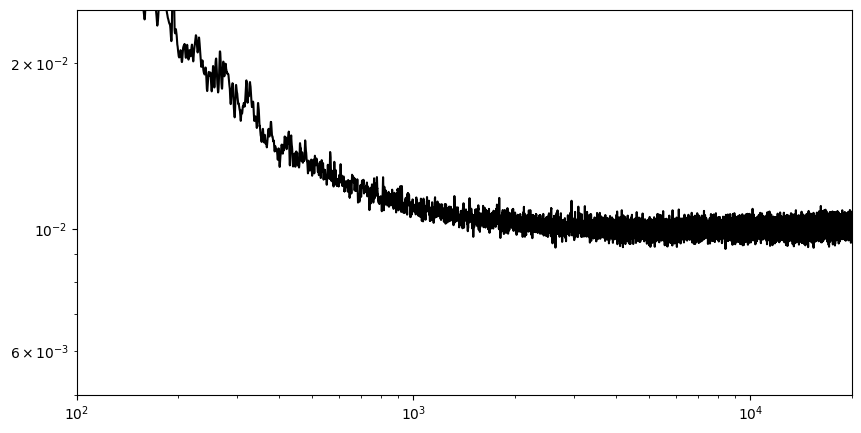

In [45]:
plt.figure(figsize=(10,5))
plt.plot(smooth_frequency_microhertz, smooth_power,color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlim(100,20000)
plt.ylim(0.005,.025)